In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shahadaleissa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df= pd.read_csv('combined_dataset.csv')
df

,Reviews
0,كان لي تجربه اكثر من رائعة اليوم في هذا الفرع ...
1,اسوء خدمة شركة اتصالات على المستوى العربي كله ...
2,اشكر الموظفة ضيء على تعاملها ورقيها وخدمتها لي...
3,اسوأ نت في العالم عانيت مليون مرررررا منهم رفع...
4,الفرع جداً ممتاز وأشكر الأخوات الموظفات على رح...
...,...
454,إنترنت لا محدود / سرعة 200 ميقا . . . . #...
455,إنترنت لا محدود / سرعة 200 ميقا . . . . #...
456,سرعة عالية 200ميجا . . . . . . . . . . 🤍💚 #ال...
457,سرعة عالية 200ميجا . . . . . . . . . . 🤍💚 #ال...


In [4]:
def count_duplicates(df):
    """
    Counts the number of duplicate rows in the given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame in which to find duplicates.

    Returns:
    int: The number of duplicate rows in the DataFrame.
    """
    # Count duplicate rows, excluding the first occurrence
    duplicates_count = df.duplicated(keep='first').sum()
    return duplicates_count

In [5]:
count_duplicates(df)

65

In [6]:
def remove_duplicates(df, subset=None, keep='first', inplace=False):
    """
    Removes duplicate rows from the given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame from which to remove duplicates.
    subset (list of str, optional): Column labels to consider for identifying duplicates. 
                                    If None, consider all columns.
    keep ({'first', 'last', False}, default 'first'): Determines which duplicates (if any) to keep.
                                                      - 'first': Drop duplicates except for the first occurrence.
                                                      - 'last': Drop duplicates except for the last occurrence.
                                                      - False: Drop all duplicates.
    inplace (bool, default False): Whether to drop duplicates in place or to return a copy.

    Returns:
    pd.DataFrame or None: A new DataFrame with duplicates removed, if inplace=False. 
                          None if inplace=True.
    """
    if inplace:
        df.drop_duplicates(subset=subset, keep=keep, inplace=True)
    else:
        return df.drop_duplicates(subset=subset, keep=keep)

In [7]:
remove_duplicates(df, inplace=True)

In [8]:
count_duplicates(df)

0

In [9]:
df.isna().sum()

Reviews    1
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isna().sum()

Reviews    0
dtype: int64

## using aranorm for arabic text processing

In [12]:
import aranorm

In [13]:
df['Reviews']=df['Reviews'].apply(aranorm.normalize_tweet)

In [14]:
df

,Reviews
0,كان لي تجربه اكثر من راءعه اليوم في هذا الفرع ...
1,اسوء خدمه شركه اتصالات علي المستوي العربي كله ...
2,اشكر الموظفه ضيء علي تعاملها ورقيها وخدمتها لي...
3,اسوا نت في العالم عانيت مليون مرررررا منهم رفع...
4,الفرع جدا ممتاز واشكر الاخوات الموظفات علي رحا...
...,...
452,قويه
453,انترنت لا محدود سرعه ميقا زين السعوديه
455,انترنت لا محدود سرعه ميقا زين السعوديه
456,سرعه عاليه ميجا ال زين يارب وماخاب من قال يارب


In [15]:
count_duplicates(df)

6

In [16]:
remove_duplicates(df, inplace=True)

In [17]:
count_duplicates(df)

0

## Sentiment Analysis

In [18]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

model_name = "CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment"  # Replace with the specific model you find
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Function to apply sentiment analysis
def analyze_sentiment(text):
    result = nlp(text)
    return result[0]['label']

# Apply the function to your DataFrame
df['sentiment'] = df['Reviews'].apply(analyze_sentiment)

# Now `df` has an additional column `sentiment` with the analysis result
print(df)

/Users/shahadaleissa/Downloads/Data Mining Project/.conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


                                               Reviews sentiment
0    كان لي تجربه اكثر من راءعه اليوم في هذا الفرع ...  positive
1    اسوء خدمه شركه اتصالات علي المستوي العربي كله ...  negative
2    اشكر الموظفه ضيء علي تعاملها ورقيها وخدمتها لي...  positive
3    اسوا نت في العالم عانيت مليون مرررررا منهم رفع...  negative
4    الفرع جدا ممتاز واشكر الاخوات الموظفات علي رحا...  positive
..                                                 ...       ...
450  التذكره ايش صار عليها محد فيكم تكرم تواصل معي ...   neutral
452                                               قويه  positive
453             انترنت لا محدود سرعه ميقا زين السعوديه  positive
456     سرعه عاليه ميجا ال زين يارب وماخاب من قال يارب  positive
458  كيف اشترك فيها لان ما تطلع لي بالتطبيق الا اذا...   neutral

[387 rows x 2 columns]


## Visualization

In [19]:
df.describe()

,Reviews,sentiment
count,387,387
unique,387,3
top,كان لي تجربه اكثر من راءعه اليوم في هذا الفرع ...,positive
freq,1,160


<Axes: xlabel='sentiment', ylabel='count'>

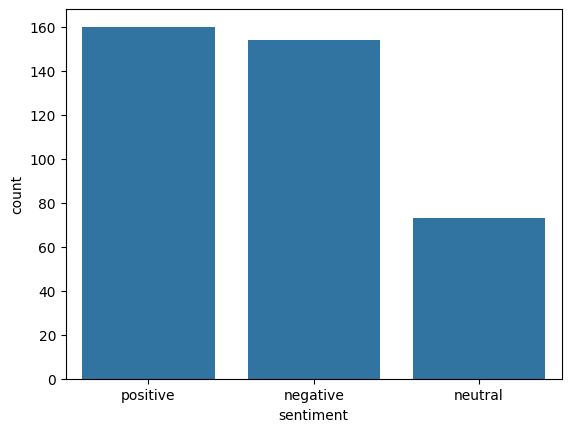

In [20]:
#create a plot to view the distribution of the sentiment
sns.countplot(x='sentiment', data=df)

### Tokenization to view word frequency 

In [22]:
df_for_tokenization = df.copy()
tokenizer = RegexpTokenizer(r'\w+')
df_for_tokenization["Reviews"] = df_for_tokenization["Reviews"].apply(tokenizer.tokenize)
stopwords_list = stopwords.words('arabic')
listToStr = ' '.join([str(elem) for elem in stopwords_list])
df_for_tokenization["Reviews"] = df_for_tokenization["Reviews"].apply(lambda x: [item for item in x if item not in listToStr])
df_for_tokenization

,Reviews,sentiment
0,"[تجربه, اكثر, راءعه, اليوم, الفرع, الخدمه, الم...",positive
1,"[اسوء, خدمه, شركه, اتصالات, المستوي, العربي, ك...",negative
2,"[اشكر, الموظفه, ضيء, تعاملها, ورقيها, وخدمتها,...",positive
3,"[اسوا, العالم, عانيت, مليون, مرررررا, منهم, رف...",negative
4,"[الفرع, جدا, ممتاز, واشكر, الاخوات, الموظفات, ...",positive
...,...,...
450,"[التذكره, ايش, عليها, محد, فيكم, تكرم, تواصل, ...",neutral
452,[قويه],positive
453,"[انترنت, محدود, سرعه, ميقا, زين, السعوديه]",positive
456,"[سرعه, عاليه, ميجا, زين, يارب, وماخاب, قال, يارب]",positive


In [29]:
import matplotlib.pyplot as plt
from collections import Counter

def get_most_common_words_by_class(df, n=10):
    """Get the most common words for each class."""
    classes = df['sentiment'].unique()
    common_words = {}
    
    for cls in classes:
        words = [word for sublist in df[df['sentiment'] == cls]['Reviews'] for word in sublist]
        most_common = Counter(words).most_common(n)
        common_words[cls] = most_common
        
    return common_words

def plot_most_common_words(common_words):
    """Plot the most common words for each class."""
    # Create a figure with subplots
    fig, axes = plt.subplots(len(common_words), 1, figsize=(10, 15))
    fig.tight_layout(pad=8.0)
    
    for i, (cls, words) in enumerate(common_words.items()):
        words, frequencies = zip(*words)
        sns.barplot(x=list(frequencies), y=list(words), ax=axes[i])
        axes[i].set_title(f'Most Common Words in {cls}')
    
    plt.show()

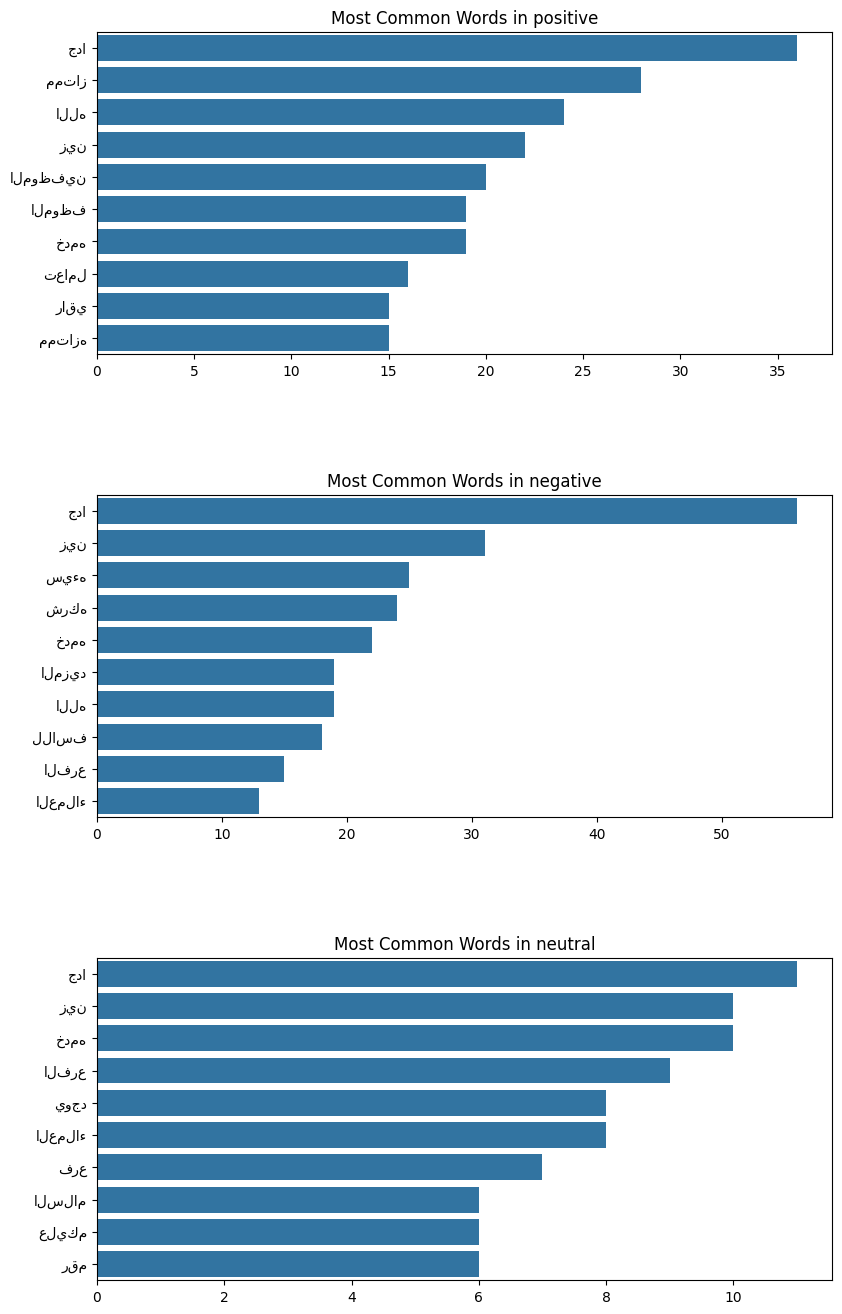

In [40]:
plt.rcParams['font.family'] = 'sans' 
# Get the most common words by class
common_words = get_most_common_words_by_class(df_for_tokenization, n=10)  # Adjust n as needed

# Plot the most common words
plot_most_common_words(common_words)